In [54]:
#1. Import necessary libraries
#python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [55]:
#2. Load the insurance data into a Pandas DataFrame
df = pd.read_csv('insurance.csv')

In [56]:
#3. Explore the data
df.head() # view the first few rows of data
df.info() # view information about the data
df.describe() # view summary statistics of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [57]:
# 4. Data cleaning
# check for missing values
df.isna().sum()

# drop rows with missing values
df.dropna(inplace=True)


In [58]:
# create a new column for sex, where 0 is female and 1 is male
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'female' else 1)

# create a new column for smoker, where 0 is non-smoker and 1 is smoker
df['smoker'] = df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

# create a new column for region, where 0 is northeast, 1 is northwest, 2 is southeast, and 3 is southwest
df['region'] = df['region'].apply(lambda x: 0 if x == 'northeast' else (1 if x == 'northwest' else (2 if x == 'southeast' else 3)))

# create a new column for bmi squared
df['bmi_squared'] = df['bmi'] ** 2

In [59]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   int64  
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   int64  
 5   region       1338 non-null   int64  
 6   charges      1338 non-null   float64
 7   bmi_squared  1338 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 83.8 KB


,age,sex,bmi,children,smoker,region,charges,bmi_squared
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,977.403997
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,387.865337
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,254.721600
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,691.492881
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,924.160000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1203.656406
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,2822.796900


<Axes: xlabel='charges', ylabel='Count'>

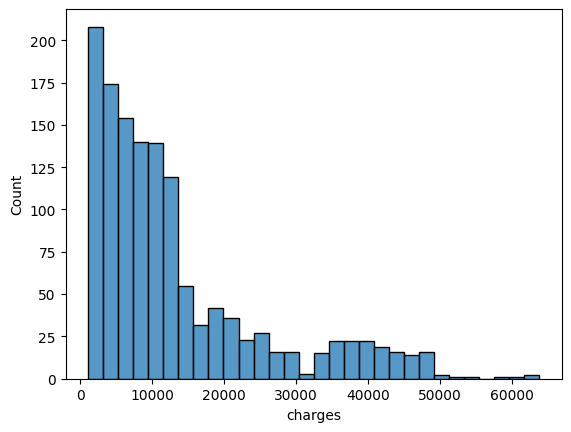

In [60]:
#5. Data visualization

# visualize the distribution of charges
sns.histplot(df['charges'])



<Axes: >

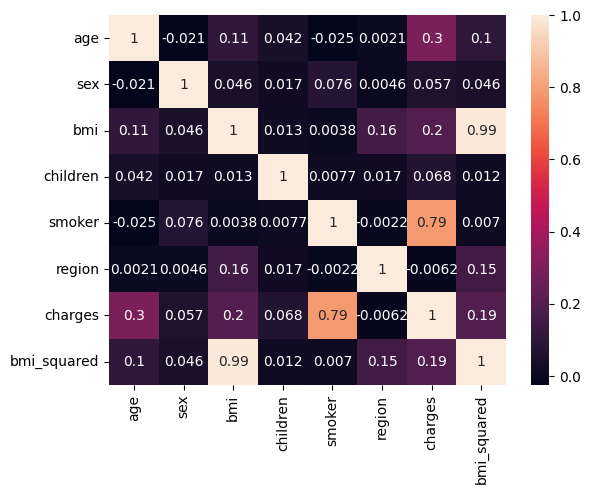

In [61]:
# visualize the correlation between variables
sns.heatmap(df.corr(), annot=True)

In [39]:
# 6. Model building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
# split the data into training and testing sets
X =df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'bmi_squared']]
y =df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# create a linear regression model and fit it to the training data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [48]:
# create a logistic regression model and fit it to the training data
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train > y_train.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
# evaluate the models on the testing data
linear_score = linear_model.score(X_test, y_test)
logistic_score = logistic_model.score(X_test, y_test > y_test.mean())

In [50]:
# print the scores
print('Linear regression score:', linear_score)
print('Logistic regression score:', logistic_score)

Linear regression score: 0.7790345869041438
Logistic regression score: 0.8917910447761194


In [62]:
# predict charges for the testing data
y_pred = model.predict(X_test)

In [63]:
# evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error: 4325.84
Mean Squared Error: 34304600.09
Root Mean Squared Error: 5857.01
R^2 Score: 0.78


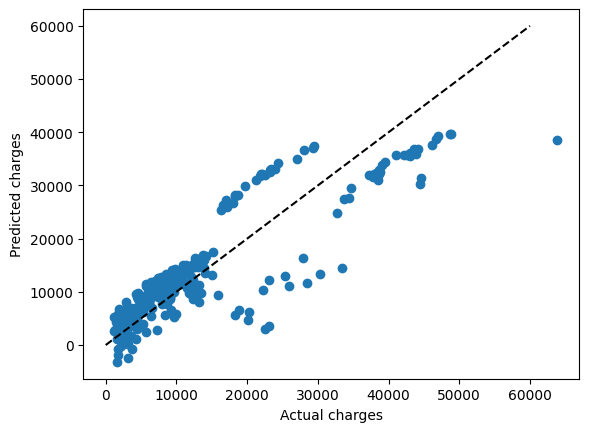

In [64]:
# plot the predicted vs actual charges for the testing data
plt.scatter(y_test, y_pred)
plt.plot([0, 60000], [0, 60000], '--k')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.show()